In [131]:
import pandas as pd
from datetime import datetime
df1= pd.read_csv('/kaggle/input/osnsoqwdui/periyar(nasa).csv')
df1

,YEAR,MO,DY,ALLSKY_SFC_SW_DWN,TS,QV2M,PRECTOTCORR,PS,WS10M_RANGE
0,1984,1,1,4.84,28.58,16.66,1.21,100.58,3.84
1,1984,1,2,5.07,27.44,15.69,0.34,100.64,2.59
2,1984,1,3,4.74,28.48,15.69,0.04,100.66,2.39
3,1984,1,4,4.36,28.36,15.93,0.00,100.72,3.34
4,1984,1,5,5.37,28.59,15.62,0.00,100.65,3.05
...,...,...,...,...,...,...,...,...,...
13965,2022,3,27,5.57,30.49,18.55,7.83,100.49,3.97
13966,2022,3,28,6.09,31.12,19.41,7.37,100.44,4.34
13967,2022,3,29,6.30,30.84,19.59,3.34,100.36,3.51
13968,2022,3,30,5.66,30.92,19.23,3.05,100.33,3.68


In [132]:
df1['datetime'] = pd.to_datetime(df1[['YEAR', 'MO', 'DY']].rename(columns={'YEAR':'year', 'MO':'month', 'DY':'day'}))
df1['datetime'] = df1['datetime'].dt.strftime('%d/%m/%Y')
df1 = df1.drop(['YEAR', 'MO', 'DY'], axis=1)
# df1 = df1.set_index('datetime')
df1

,ALLSKY_SFC_SW_DWN,TS,QV2M,PRECTOTCORR,PS,WS10M_RANGE,datetime
0,4.84,28.58,16.66,1.21,100.58,3.84,01/01/1984
1,5.07,27.44,15.69,0.34,100.64,2.59,02/01/1984
2,4.74,28.48,15.69,0.04,100.66,2.39,03/01/1984
3,4.36,28.36,15.93,0.00,100.72,3.34,04/01/1984
4,5.37,28.59,15.62,0.00,100.65,3.05,05/01/1984
...,...,...,...,...,...,...,...
13965,5.57,30.49,18.55,7.83,100.49,3.97,27/03/2022
13966,6.09,31.12,19.41,7.37,100.44,4.34,28/03/2022
13967,6.30,30.84,19.59,3.34,100.36,3.51,29/03/2022
13968,5.66,30.92,19.23,3.05,100.33,3.68,30/03/2022


In [133]:
df2 = pd.read_csv('/kaggle/input/osnsoqwdui/Periyar_Gauge-Discharge_Data_Neeleswaram1971-20171.csv', header=2,na_values='null')
df2 = df2.drop(['Observed/Computed','Data Type'],axis=1)
# df2 = df2.set_index('Day')
df2

,Day,Mean Gauge (m),Discharge (cumecs)
0,1/6/1971,2.68,95.200
1,2/6/1971,3.70,366.000
2,3/6/1971,3.62,314.000
3,4/6/1971,3.18,223.500
4,5/6/1971,3.27,249.800
...,...,...,...
9751,27/5/2017,3.52,48.885
9752,28/5/2017,0.38,NaN
9753,29/5/2017,3.26,0.000
9754,30/5/2017,3.62,43.822


merging two data set based on the common dates

In [134]:
df1['datetime'] = pd.to_datetime(df1['datetime'], format='%d/%m/%Y')
df2['Day'] = pd.to_datetime(df2['Day'], format='%d/%m/%Y')

df2 = df2.rename(columns={'Day': 'datetime'})
df2 = df2.set_index('datetime')
df1=df1.set_index('datetime')
df = pd.concat([df1, df2], axis=1, join='inner')

In [135]:
df

,ALLSKY_SFC_SW_DWN,TS,QV2M,PRECTOTCORR,PS,WS10M_RANGE,Mean Gauge (m),Discharge (cumecs)
datetime,,,,,,,,
1984-06-01,5.64,27.01,19.04,15.14,100.27,4.79,2.65,62.300
1984-06-02,1.51,26.56,19.35,37.14,99.99,3.75,3.61,268.800
1984-06-03,2.46,26.32,19.29,52.97,100.13,2.80,4.36,397.000
1984-06-04,6.34,25.97,18.68,20.48,100.34,3.73,3.43,209.400
1984-06-05,6.76,26.60,18.92,3.61,100.34,3.16,3.12,124.500
...,...,...,...,...,...,...,...,...
2017-05-27,4.91,28.20,19.96,5.81,100.17,1.33,3.52,48.885
2017-05-28,3.96,27.97,20.63,23.22,100.21,2.88,0.38,NaN
2017-05-29,3.44,28.33,20.57,19.07,100.17,3.14,3.26,0.000


In [136]:
# from google.colab import files
# df.to_csv('chalakudi_combined.csv', index=True)
# files.download('chalakudi_combined.csv')

In [137]:
min(df['Discharge (cumecs)'])

0.0

In [138]:
max(df['Discharge (cumecs)'])

6323.547

In [139]:
df.isnull().sum()

ALLSKY_SFC_SW_DWN       0
TS                      0
QV2M                    0
PRECTOTCORR             0
PS                      0
WS10M_RANGE             0
Mean Gauge (m)          0
Discharge (cumecs)    254
dtype: int64

In [140]:
# df['TS'] = df['TS'].interpolate(method='linear')
# df['T2M'] = df['T2M'].interpolate(method='linear')
# df['QV2M'] = df['QV2M'].interpolate(method='linear')
# df['PRECTOTCORR'] = df['PRECTOTCORR'].interpolate(method='linear')
# df['PS'] = df['PS'].interpolate(method='linear')
# df['WS50M_RANGE'] = df['WS50M_RANGE'].interpolate(method='linear')
df['Discharge (cumecs)'] = df['Discharge (cumecs)'].interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')

In [141]:
df.isnull().sum()

ALLSKY_SFC_SW_DWN     0
TS                    0
QV2M                  0
PRECTOTCORR           0
PS                    0
WS10M_RANGE           0
Mean Gauge (m)        0
Discharge (cumecs)    0
dtype: int64

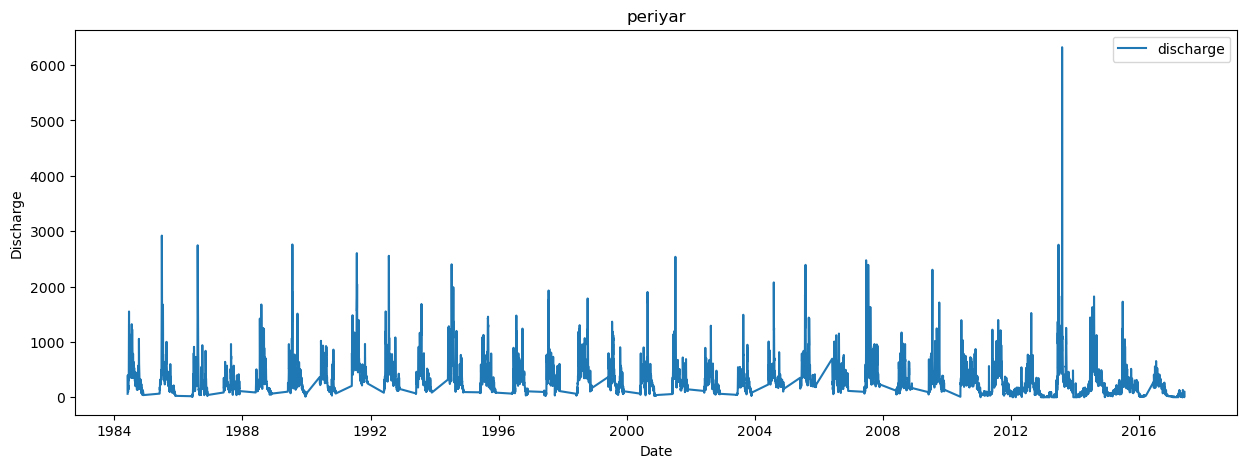

In [142]:
plt.figure(figsize=(15, 5))
plt.plot(df['Discharge (cumecs)'],label='discharge')
plt.title("periyar")
plt.xlabel('Date')
plt.ylabel('Discharge')
plt.legend()
plt.show()

In [143]:
df.corr()

,ALLSKY_SFC_SW_DWN,TS,QV2M,PRECTOTCORR,PS,WS10M_RANGE,Mean Gauge (m),Discharge (cumecs)
ALLSKY_SFC_SW_DWN,1.000000,0.395910,-0.292539,-0.498261,0.299482,-0.091036,-0.168280,-0.421462
TS,0.395910,1.000000,-0.196037,-0.238434,0.171086,0.205313,-0.158456,-0.487887
QV2M,-0.292539,-0.196037,1.000000,0.297700,-0.472082,-0.107521,-0.006882,0.287706
PRECTOTCORR,-0.498261,-0.238434,0.297700,1.000000,-0.299650,0.093660,0.170636,0.398841
PS,0.299482,0.171086,-0.472082,-0.299650,1.000000,-0.040973,-0.069632,-0.217851
WS10M_RANGE,-0.091036,0.205313,-0.107521,0.093660,-0.040973,1.000000,0.120189,0.066367
Mean Gauge (m),-0.168280,-0.158456,-0.006882,0.170636,-0.069632,0.120189,1.000000,0.523846
Discharge (cumecs),-0.421462,-0.487887,0.287706,0.398841,-0.217851,0.066367,0.523846,1.000000


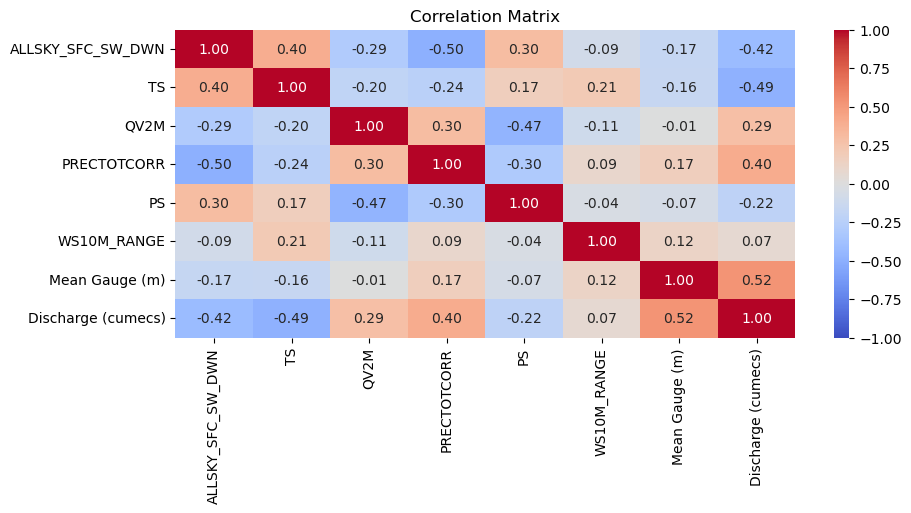

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


In [145]:
df

,ALLSKY_SFC_SW_DWN,TS,QV2M,PRECTOTCORR,PS,WS10M_RANGE,Mean Gauge (m),Discharge (cumecs)
datetime,,,,,,,,
1984-06-01,5.64,27.01,19.04,15.14,100.27,4.79,2.65,62.3000
1984-06-02,1.51,26.56,19.35,37.14,99.99,3.75,3.61,268.8000
1984-06-03,2.46,26.32,19.29,52.97,100.13,2.80,4.36,397.0000
1984-06-04,6.34,25.97,18.68,20.48,100.34,3.73,3.43,209.4000
1984-06-05,6.76,26.60,18.92,3.61,100.34,3.16,3.12,124.5000
...,...,...,...,...,...,...,...,...
2017-05-27,4.91,28.20,19.96,5.81,100.17,1.33,3.52,48.8850
2017-05-28,3.96,27.97,20.63,23.22,100.21,2.88,0.38,24.4425
2017-05-29,3.44,28.33,20.57,19.07,100.17,3.14,3.26,0.0000


splitting the data set to train and test data
train data- before 2010-01-10
test data- after 2010-01-10


In [146]:
df.index = pd.to_datetime(df.index)
cutoff_date = pd.to_datetime('2010-01-10')
train = df[df.index < cutoff_date]
test = df[df.index >= cutoff_date]
train

,ALLSKY_SFC_SW_DWN,TS,QV2M,PRECTOTCORR,PS,WS10M_RANGE,Mean Gauge (m),Discharge (cumecs)
datetime,,,,,,,,
1984-06-01,5.64,27.01,19.04,15.14,100.27,4.79,2.65,62.300
1984-06-02,1.51,26.56,19.35,37.14,99.99,3.75,3.61,268.800
1984-06-03,2.46,26.32,19.29,52.97,100.13,2.80,4.36,397.000
1984-06-04,6.34,25.97,18.68,20.48,100.34,3.73,3.43,209.400
1984-06-05,6.76,26.60,18.92,3.61,100.34,3.16,3.12,124.500
...,...,...,...,...,...,...,...,...
2009-11-26,5.58,27.68,17.64,0.17,100.57,2.31,0.77,221.556
2009-11-27,5.52,27.33,15.50,0.02,100.60,2.66,0.35,130.100
2009-11-28,5.86,26.70,14.22,0.00,100.68,3.00,0.79,260.280


In [147]:
test

,ALLSKY_SFC_SW_DWN,TS,QV2M,PRECTOTCORR,PS,WS10M_RANGE,Mean Gauge (m),Discharge (cumecs)
datetime,,,,,,,,
2010-06-01,6.14,28.20,19.71,3.69,100.41,2.41,0.59,9.6600
2010-06-02,6.09,28.77,20.69,20.80,100.44,2.27,0.48,8.2050
2010-06-03,5.56,28.99,20.63,7.21,100.46,1.20,0.85,260.2000
2010-06-04,5.17,28.62,21.18,11.14,100.55,1.39,0.70,230.9000
2010-06-05,5.80,28.04,19.29,19.69,100.60,3.03,0.70,230.9000
...,...,...,...,...,...,...,...,...
2017-05-27,4.91,28.20,19.96,5.81,100.17,1.33,3.52,48.8850
2017-05-28,3.96,27.97,20.63,23.22,100.21,2.88,0.38,24.4425
2017-05-29,3.44,28.33,20.57,19.07,100.17,3.14,3.26,0.0000


In [148]:
forcast_dates=test.index
forcast_dates


DatetimeIndex(['2010-06-01', '2010-06-02', '2010-06-03', '2010-06-04',
               '2010-06-05', '2010-06-06', '2010-06-07', '2010-06-08',
               '2010-06-09', '2010-06-10',
               ...
               '2017-05-22', '2017-05-23', '2017-05-24', '2017-05-25',
               '2017-05-26', '2017-05-27', '2017-05-28', '2017-05-29',
               '2017-05-30', '2017-05-31'],
              dtype='datetime64[ns]', name='datetime', length=2557, freq=None)

In [149]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler=scaler.fit(df)

In [150]:
train =scaler.transform(train)
train

array([[0.76144244, 0.3024236 , 0.81697171, ..., 0.52657602, 0.22398101,
        0.00985207],
       [0.18862691, 0.25500527, 0.84276206, ..., 0.39802225, 0.29996043,
        0.04250779],
       [0.32038835, 0.22971549, 0.83777038, ..., 0.28059333, 0.35931935,
        0.06278122],
       ...,
       [0.79195562, 0.26975764, 0.41597338, ..., 0.3053152 , 0.07677087,
        0.04116044],
       [0.74757282, 0.31717597, 0.48169717, ..., 0.17058096, 0.03244954,
        0.01687344],
       [0.629681  , 0.37091675, 0.61397671, ..., 0.20519159, 0.0514444 ,
        0.02157191]])

In [151]:
test=scaler.transform(test)
test

array([[0.83079057, 0.42781876, 0.87271215, ..., 0.23238566, 0.06094183,
        0.00152762],
       [0.82385576, 0.48788198, 0.95424293, ..., 0.21508035, 0.05223585,
        0.00129753],
       [0.75034674, 0.51106428, 0.94925125, ..., 0.08281829, 0.08151959,
        0.04114779],
       ...,
       [0.45631068, 0.44151739, 0.94425957, ..., 0.32262052, 0.2722596 ,
        0.        ],
       [0.59361997, 0.4573235 , 1.        , ..., 0.24351051, 0.30075188,
        0.00692997],
       [0.72122053, 0.42044257, 0.94425957, ..., 0.20519159, 0.27938267,
        0.01519511]])

defining input shape to lstm
here input shape is (14,7) past 14 days values of 7 attributes
output shape is (1,3) 3 days future values 

In [152]:
import  numpy as np
trainx=[]
trainy=[]
n_future=3
n_past=14
for i in range(n_past,len(train)-n_future+1):
  # c = np.concatenate((train[i:i+1,0:3], train[i:i+1,4:8]), axis=1)
  trainx.append(train[i-n_past:i,0:8])
  trainy.append(train[i:i+n_future,7])
trainx,trainy=np.array(trainx),np.array(trainy)

In [153]:
trainx.shape

(4773, 14, 8)

In [154]:
trainy.shape

(4773, 3)

In [155]:
import tensorflow as tf
# import tf.keras as keras
from keras.models import Sequential
from keras.layers import LSTM,GRU,Bidirectional
from keras.layers import Dense,Dropout
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns


In [156]:
model1 = Sequential()
model1.add(GRU(units=256,activation='relu',return_sequences=True,input_shape=(n_past,8)))
model1.add(GRU(units=256,activation='relu',return_sequences=False))
# model1.add(Bidirectional(LSTM(units=256,activation='relu',return_sequences=True)))
# model1.add(Bidirectional(LSTM(units=128,activation='relu',return_sequences=True)))
# model1.add(Bidirectional(LSTM(units=128,activation='relu',return_sequences=True)))
# model1.add(Bidirectional(LSTM(units=128,activation='relu',return_sequences=True)))
# model1.add(Bidirectional(LSTM(units=64,activation='relu')))
model1.add(Dense(n_future,activation='relu'))
model1.compile(optimizer='adam',loss='mse')

In [157]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (None, 14, 256)           204288    
                                                                 
 gru_3 (GRU)                 (None, 256)               394752    
                                                                 
 dense_1 (Dense)             (None, 3)                 771       
                                                                 
Total params: 599,811
Trainable params: 599,811
Non-trainable params: 0
_________________________________________________________________


In [158]:
model1.fit(trainx, trainy, epochs=250, batch_size=8000, validation_split=0.2, verbose=1)


Epoch 1/250
1/1 [==============================] - 4s 4s/step - loss: 0.0047 - val_loss: 0.0048
Epoch 2/250
1/1 [==============================] - 0s 143ms/step - loss: 0.0051 - val_loss: 0.0036
Epoch 3/250
1/1 [==============================] - 0s 130ms/step - loss: 0.0035 - val_loss: 0.0040
Epoch 4/250
1/1 [==============================] - 0s 143ms/step - loss: 0.0033 - val_loss: 0.0045
Epoch 5/250
1/1 [==============================] - 0s 148ms/step - loss: 0.0036 - val_loss: 0.0035
Epoch 6/250
1/1 [==============================] - 0s 132ms/step - loss: 0.0027 - val_loss: 0.0026
Epoch 7/250
1/1 [==============================] - 0s 134ms/step - loss: 0.0021 - val_loss: 0.0023
Epoch 8/250
1/1 [==============================] - 0s 126ms/step - loss: 0.0022 - val_loss: 0.0022
Epoch 9/250
1/1 [==============================] - 0s 129ms/step - loss: 0.0024 - val_loss: 0.0021
Epoch 10/250
1/1 [==============================] - 0s 131ms/step - loss: 0.0022 - val_loss: 0.0019
Epoch 11/250

In [159]:
asd=model1.predict(trainx)

150/150 [==============================] - 1s 6ms/step


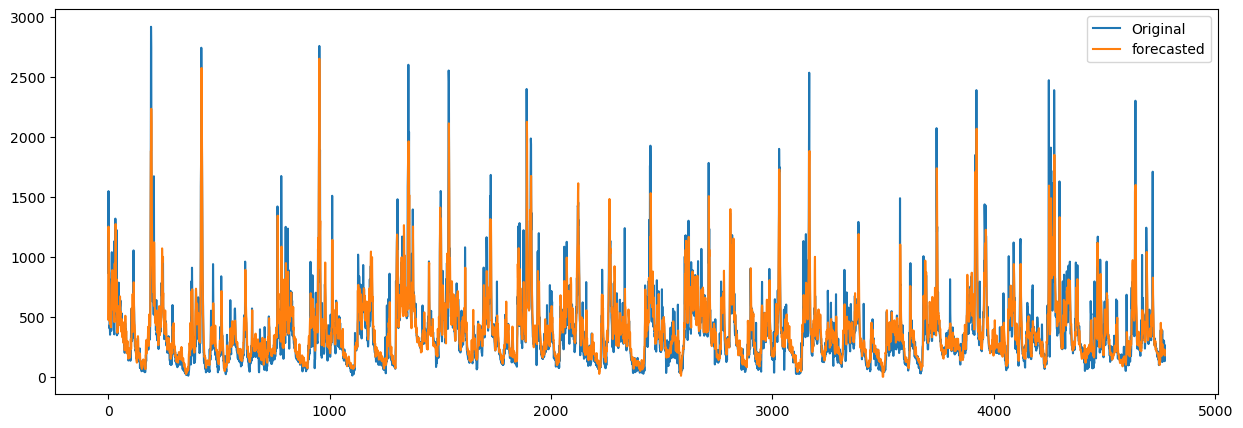

RMSE: 147.5673412170081
R-squared score: 0.77
MAD: 92.16546807730123
MAE score: 92.17


In [160]:
first_elements = [[row[0]] for row in asd]
#print(first_elements)
ppprr=np.array(first_elements)
#print(pppr.shape)
import numpy as np
forcast_copies = np.repeat(ppprr, df.shape[1], axis=-1)
disc = scaler.inverse_transform(forcast_copies)[:,7]
disc.shape

first_elements = [[row[7]] for row in train]
#print(first_elements)
ppp=np.array(first_elements)
#print(pppr.shape)
org_copies = np.repeat(ppp, df.shape[1], axis=-1)
disc_org= scaler.inverse_transform(org_copies)[:,7]
disc_org.shape
plt.figure(figsize=(15, 5))
plt.plot(disc_org[n_past:-2],label='Original')
plt.plot(disc,label='forecasted')

plt.legend()
plt.show()
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(disc_org[n_past:-2],disc))
print("RMSE:",rmse)

actual = disc_org[n_past:-2]
forecast = disc 

# mape = np.mean(np.abs((actual - actual) / actual)) * 100
# print('MAPE:', mape)

from sklearn.metrics import r2_score


r2_score = r2_score(actual, forecast)
print("R-squared score: {:.2f}".format(r2_score))

mad = np.mean(np.abs(actual - forecast))
print('MAD:', mad)

from sklearn.metrics import mean_absolute_error
mae_score = mean_absolute_error(actual, forecast)
print("MAE score: {:.2f}".format(mae_score))

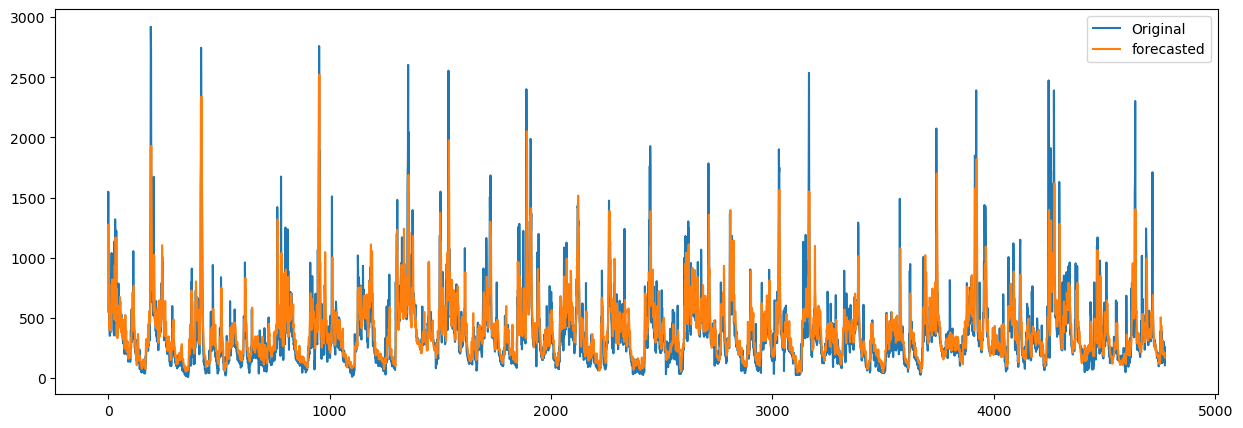

RMSE: 181.53562573294596
R-squared score: 0.66
MAD: 114.71738828697501
MAE score: 114.72


In [161]:
second_elements = [[row[1]] for row in asd]
#print(first_elements)
ppprr=np.array(second_elements )
#print(pppr.shape)
import numpy as np
forcast_copies = np.repeat(ppprr, df.shape[1], axis=-1)
disc = scaler.inverse_transform(forcast_copies)[:,7]
disc.shape

first_elements = [[row[7]] for row in train]
#print(first_elements)
ppp=np.array(first_elements)
#print(pppr.shape)
org_copies = np.repeat(ppp, df.shape[1], axis=-1)
disc_org= scaler.inverse_transform(org_copies)[:,7]
disc_org.shape
plt.figure(figsize=(15, 5))
plt.plot(disc_org[n_past+1:-1],label='Original')
plt.plot(disc,label='forecasted')

plt.legend()
plt.show()
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(disc_org[n_past+1:-1],disc))
print("RMSE:",rmse)

actual = disc_org[n_past+1:-1]
forecast = disc 

# mape = np.mean(np.abs((actual - actual) / actual)) * 100
# print('MAPE:', mape)

from sklearn.metrics import r2_score


r2_score = r2_score(actual, forecast)
print("R-squared score: {:.2f}".format(r2_score))

mad = np.mean(np.abs(actual - forecast))
print('MAD:', mad)

from sklearn.metrics import mean_absolute_error
mae_score = mean_absolute_error(actual, forecast)
print("MAE score: {:.2f}".format(mae_score))

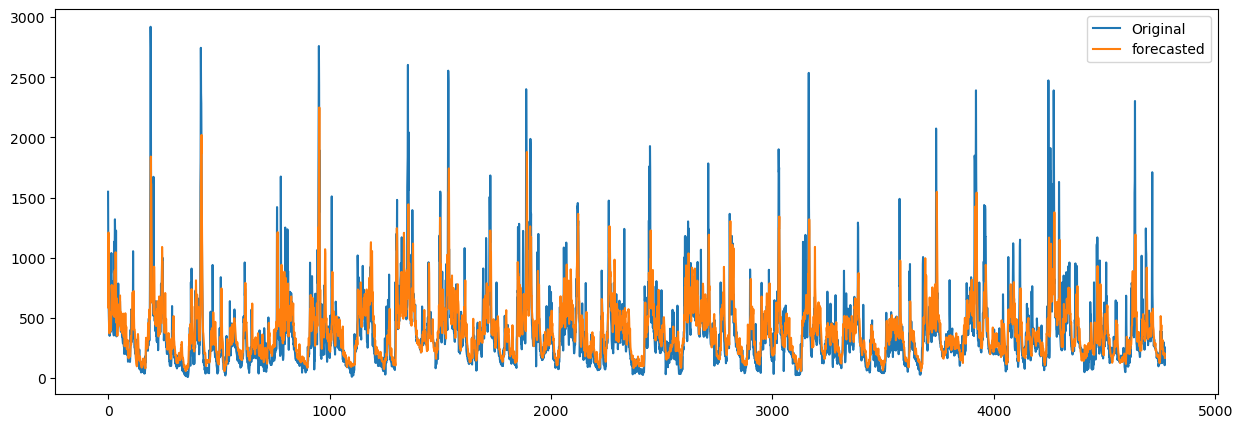

RMSE: 207.54406242703078
R-squared score: 0.55
MAD: 132.41077589331786
MAE score: 132.41


In [162]:
third_elements = [[row[2]] for row in asd]
#print(first_elements)
ppprr=np.array(third_elements )
#print(pppr.shape)
import numpy as np
forcast_copies = np.repeat(ppprr, df.shape[1], axis=-1)
disc = scaler.inverse_transform(forcast_copies)[:,7]
disc.shape

first_elements = [[row[7]] for row in train]
#print(first_elements)
ppp=np.array(first_elements)
#print(pppr.shape)
org_copies = np.repeat(ppp, df.shape[1], axis=-1)
disc_org= scaler.inverse_transform(org_copies)[:,7]
disc_org.shape
plt.figure(figsize=(15, 5))
plt.plot(disc_org[n_past+2:len(disc_org)],label='Original')
plt.plot(disc,label='forecasted')

plt.legend()
plt.show()
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(disc_org[n_past+2:len(disc_org)],disc))
print("RMSE:",rmse)

actual = disc_org[n_past+2:len(disc_org)]
forecast = disc 

# mape = np.mean(np.abs((actual - actual) / actual)) * 100
# print('MAPE:', mape)

from sklearn.metrics import r2_score


r2_score = r2_score(actual, forecast)
print("R-squared score: {:.2f}".format(r2_score))

mad = np.mean(np.abs(actual - forecast))
print('MAD:', mad)

from sklearn.metrics import mean_absolute_error
mae_score = mean_absolute_error(actual, forecast)
print("MAE score: {:.2f}".format(mae_score))

for testing 
input shape is (14,7) past 14 days values of 7 attributes 
output shape is (1,3) 3 days future values

In [163]:
testx=[]
testy=[]
n_future=3
n_past=14
for i in range(n_past,len(test)-n_future+1):
  # c = np.concatenate((test[i:i+1,0:3], test[i:i+1,4:8]), axis=1)
  testx.append(test[i-n_past:i,0:8])
  testy.append(test[i:i+n_future,7])
testx,testy=np.array(testx),np.array(testy)

In [164]:
testy

array([[0.11552788, 0.06168342, 0.06378113],
       [0.06168342, 0.06378113, 0.06060728],
       [0.06378113, 0.06060728, 0.05486873],
       ...,
       [0.00773063, 0.00386531, 0.        ],
       [0.00386531, 0.        , 0.00692997],
       [0.        , 0.00692997, 0.01519511]])

In [165]:
testx.shape

(2541, 14, 8)

In [166]:
testx.shape

(2541, 14, 8)

In [167]:
fore=model1.predict(testx)

80/80 [==============================] - 0s 6ms/step


In [168]:
fore

array([[0.1060726 , 0.08292216, 0.06982356],
       [0.08442071, 0.06778228, 0.05999778],
       [0.06291979, 0.05676467, 0.05485376],
       ...,
       [0.02723567, 0.03406151, 0.03873359],
       [0.02315237, 0.02928905, 0.03378914],
       [0.02138529, 0.02815985, 0.03540972]], dtype=float32)

fore contains repation of days([day1,day2,day3],[day2,day3,day4],[day3,day4,day5])
so we take first col only (day1,day2,day3...)

In [169]:
first_elements = [[row[0]] for row in fore]
#print(first_elements)
ppprr=np.array(first_elements)
#print(pppr.shape)

In [170]:
import numpy as np
forcast_copies = np.repeat(ppprr, df.shape[1], axis=-1)
disc = scaler.inverse_transform(forcast_copies)[:,7]
disc.shape

(2541,)

In [171]:
first_elements = [[row[7]] for row in test]
#print(first_elements)
ppp=np.array(first_elements)
#print(pppr.shape)

In [172]:
org_copies = np.repeat(ppp, df.shape[1], axis=-1)
disc_org= scaler.inverse_transform(org_copies)[:,7]
disc_org.shape

(2557,)

In [173]:
min(disc)

0.0

In [174]:
max(disc)

3260.5977

In [175]:
max(disc_org)

6323.547

In [176]:
min(disc_org)

0.0

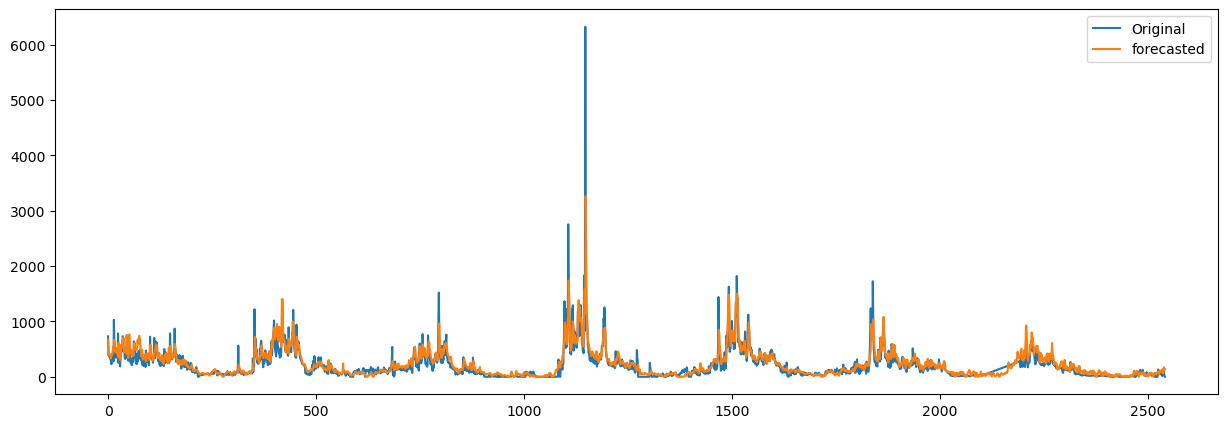

In [177]:
plt.figure(figsize=(15, 5))
plt.plot(disc_org[n_past:-2],label='Original')
plt.plot(disc,label='forecasted')

plt.legend()
plt.show()

In [178]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(disc_org[n_past:-2],disc))
print("RMSE:",rmse)

actual = disc_org[n_past:-2]
forecast = disc 

# mape = np.mean(np.abs((actual - actual) / actual)) * 100
# print('MAPE:', mape)

from sklearn.metrics import r2_score


r2_score = r2_score(actual, forecast)
print("R-squared score: {:.2f}".format(r2_score))

mad = np.mean(np.abs(actual - forecast))
print('MAD:', mad)

from sklearn.metrics import mean_absolute_error
mae_score = mean_absolute_error(actual, forecast)
print("MAE score: {:.2f}".format(mae_score))

RMSE: 157.64937890018015
R-squared score: 0.67
MAD: 74.20670916728682
MAE score: 74.21


In [179]:

# forcast_period_dates=pd.date_range(test.index[-1],periods=len(test),freq='1d').tolist()
# forcast_dates=[]
# for time in forcast_period_dates:
#     forcast_dates.append(time.date())
# forcast_dates[0:15]

In [180]:
forcast_dates

DatetimeIndex(['2010-06-01', '2010-06-02', '2010-06-03', '2010-06-04',
               '2010-06-05', '2010-06-06', '2010-06-07', '2010-06-08',
               '2010-06-09', '2010-06-10',
               ...
               '2017-05-22', '2017-05-23', '2017-05-24', '2017-05-25',
               '2017-05-26', '2017-05-27', '2017-05-28', '2017-05-29',
               '2017-05-30', '2017-05-31'],
              dtype='datetime64[ns]', name='datetime', length=2557, freq=None)

In [181]:
dt_forcast = np.column_stack((np.array([d.timestamp() for d in forcast_dates[n_past:-2]]), disc))
dt_forcast = pd.DataFrame(dt_forcast, columns=['Date', 'discharge'])
dt_forcast['Date'] = pd.to_datetime(dt_forcast['Date'], unit='s')
dt_forcast['Date'] = dt_forcast['Date'].dt.tz_localize(None) # remove any timezone information

dt_forcast = dt_forcast.set_index('Date')


orginal = disc_org[n_past:-2]
dt = np.column_stack((forcast_dates[n_past:-2].astype(int) // 10**9, orginal))
dt = pd.DataFrame(dt, columns=['Date', 'discharge'])
dt['Date'] = pd.to_datetime(dt['Date'], unit='s')
dt['Date'] = dt['Date'].dt.tz_localize(None) # remove any timezone information
dt = dt.set_index('Date')

dt_forcast


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  # Remove the CWD from sys.path while we load stuff.


,discharge
Date,
2010-06-15,670.755066
2010-06-16,533.838318
2010-06-17,397.876251
2010-06-18,420.947205
2010-06-19,401.742340
...,...
2017-05-25,66.096611
2017-05-26,153.863190
2017-05-27,172.226044


In [182]:
dt

,discharge
Date,
2010-06-15,730.5460
2010-06-16,390.0580
2010-06-17,403.3230
2010-06-18,383.2530
2010-06-19,346.9650
...,...
2017-05-25,104.2260
2017-05-26,100.3730
2017-05-27,48.8850


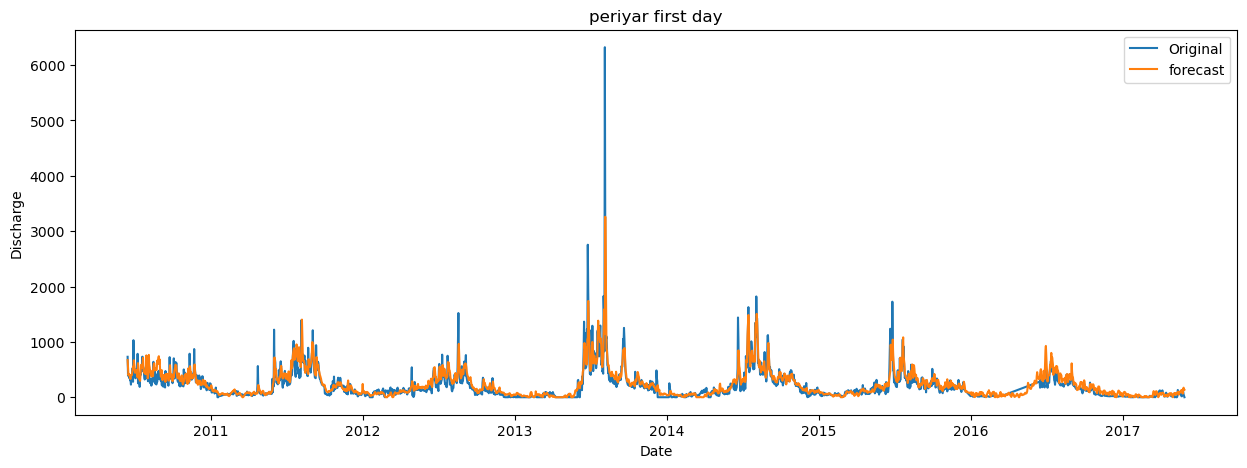

In [183]:
plt.figure(figsize=(15, 5))

plt.plot(dt.index, dt, label='Original')
plt.plot(dt_forcast.index, dt_forcast['discharge'], label='forecast')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Discharge')
plt.title("periyar first day")
plt.show()

In [184]:
dt['discharge'][-10:-1]

Date
2017-05-20     47.1390
2017-05-21     32.4010
2017-05-22     17.6630
2017-05-23     17.0320
2017-05-24     60.6290
2017-05-25    104.2260
2017-05-26    100.3730
2017-05-27     48.8850
2017-05-28     24.4425
Name: discharge, dtype: float64

In [185]:
disc_org[-10:-1]

array([ 17.663 ,  17.032 ,  60.629 , 104.226 , 100.373 ,  48.885 ,
        24.4425,   0.    ,  43.822 ])

In [186]:
dt_forcast['discharge'][:10]

Date
2010-06-15    670.755066
2010-06-16    533.838318
2010-06-17    397.876251
2010-06-18    420.947205
2010-06-19    401.742340
2010-06-20    388.078094
2010-06-21    343.913391
2010-06-22    331.148224
2010-06-23    384.304047
2010-06-24    407.658295
Name: discharge, dtype: float64

In [187]:
disc[:10]

array([670.75507, 533.8383 , 397.87625, 420.9472 , 401.74234, 388.0781 ,
       343.9134 , 331.14822, 384.30405, 407.6583 ], dtype=float32)

In [188]:
dt_forcast['discharge'][-10:]

Date
2017-05-20     84.265770
2017-05-21    124.988060
2017-05-22    102.004303
2017-05-23    130.741592
2017-05-24    113.848625
2017-05-25     66.096611
2017-05-26    153.863190
2017-05-27    172.226044
2017-05-28    146.405121
2017-05-29    135.230881
Name: discharge, dtype: float64

In [189]:
disc[-10:]

array([ 84.26577 , 124.98806 , 102.0043  , 130.7416  , 113.848625,
        66.09661 , 153.86319 , 172.22604 , 146.40512 , 135.23088 ],
      dtype=float32)

In [190]:
rmse = sqrt(mean_squared_error(dt_forcast['discharge'],dt['discharge']))
print("RMSE:",rmse)
from sklearn.metrics import mean_squared_error, r2_score
import math
actual = disc_org[n_past:-2]
forecast = disc
r2 = r2_score(actual, forecast)
print("R-squared score: {:.2f}".format(r2))


RMSE: 157.64937890018015
R-squared score: 0.67


In [191]:
second_elements = [[row[1]] for row in fore]
# print(second_elements)
pppr=np.array(second_elements)
# print(pppr.shape)


In [192]:
import numpy as np
forcast_copies = np.repeat(pppr, df.shape[1], axis=-1)
disc = scaler.inverse_transform(forcast_copies)[:,7]
disc.shape

(2541,)

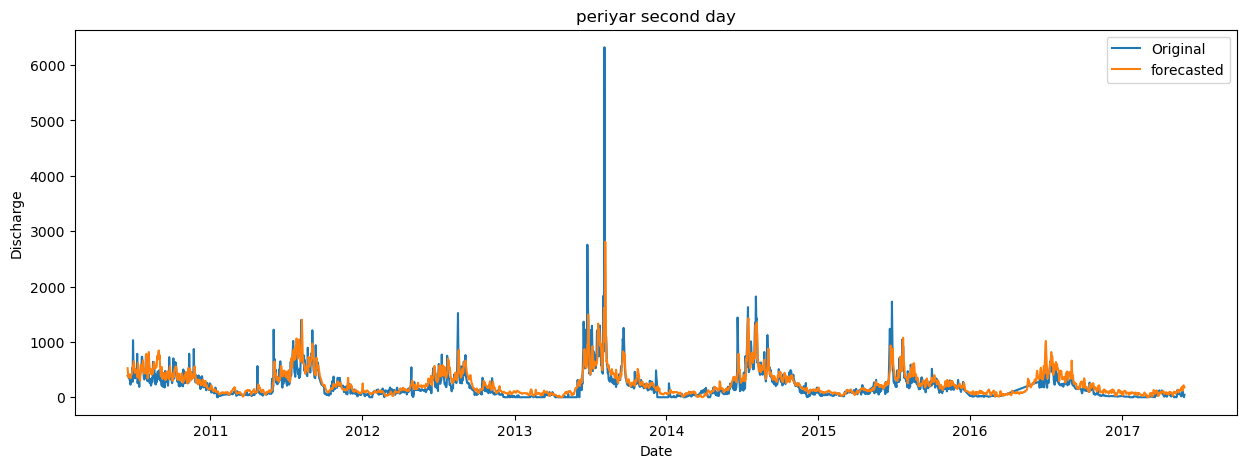

RMSE: 177.38958673167042
R-squared score: 0.58
MAD: 94.22967478548911
MAE score: 94.23


In [193]:

x=forcast_dates[n_past+1:-1]
plt.figure(figsize=(15, 5))
plt.plot(x,disc_org[n_past+1:-1],label='Original')
plt.plot(x,disc,label='forecasted')
plt.title("periyar second day")
plt.xlabel('Date')
plt.ylabel('Discharge')
plt.legend()
plt.show()
#secondday
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(disc_org[n_past+1:-1],disc))
print("RMSE:",rmse)

actual = disc_org[n_past+1:-1]
forecast = disc 

# mape = np.mean(np.abs((actual - actual) / actual)) * 100
# print('MAPE:', mape)

from sklearn.metrics import r2_score


r2_score = r2_score(actual, forecast)
print("R-squared score: {:.2f}".format(r2_score))

mad = np.mean(np.abs(actual - forecast))
print('MAD:', mad)

from sklearn.metrics import mean_absolute_error
mae_score = mean_absolute_error(actual, forecast)
print("MAE score: {:.2f}".format(mae_score))

fore contains repation of days([day1,day2,day3],[day2,day3,day4],[day3,day4,day5])
so we take first col only (day3,day4,day5...)

In [194]:
third_elements = [[row[2]] for row in fore]
#print(third_elements)
pppr=np.array(third_elements)
# print(pppr.shape)


In [195]:
import numpy as np
forcast_copies = np.repeat(pppr, df.shape[1], axis=-1)
disc = scaler.inverse_transform(forcast_copies)[:,7]
disc.shape


(2541,)

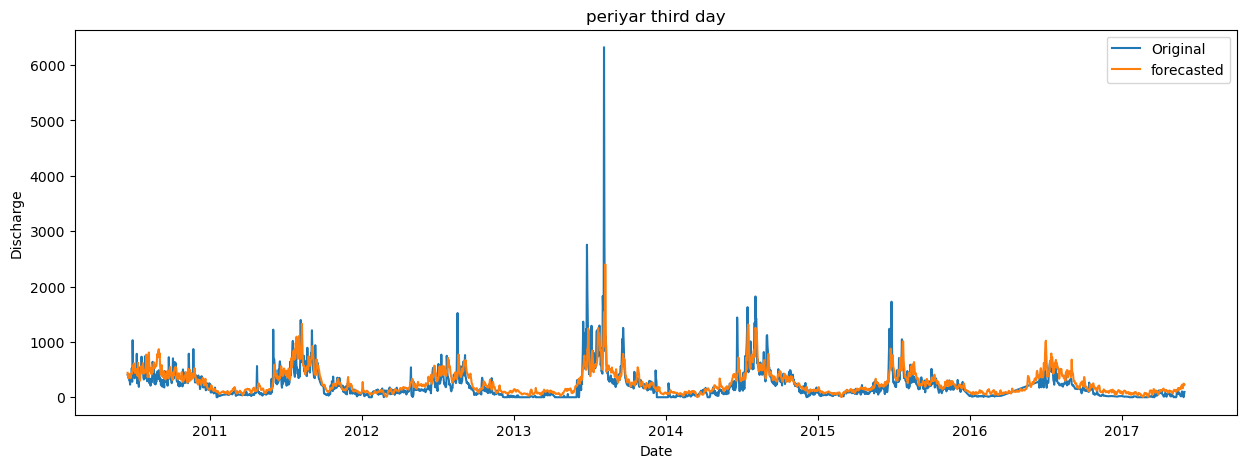

RMSE: 188.37484379680578
R-squared score: 0.53
MAD: 106.72330662758615
MAE score: 106.72


In [196]:
x=forcast_dates[n_past+2:len(disc_org)]
plt.figure(figsize=(15, 5))
plt.plot(x,disc_org[n_past+2:len(disc_org)],label='Original')
plt.plot(x,disc,label='forecasted')
plt.title("periyar third day")
plt.xlabel('Date')
plt.ylabel('Discharge')
plt.legend()
plt.show()
#thirdday
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(disc_org[n_past+2:len(disc_org)],disc))
print("RMSE:",rmse)

actual = disc_org[n_past+2:len(disc_org)]
forecast = disc 

# mape = np.mean(np.abs((actual - actual) / actual)) * 100
# print('MAPE:', mape)

from sklearn.metrics import r2_score


r2_score = r2_score(actual, forecast)
print("R-squared score: {:.2f}".format(r2_score))

mad = np.mean(np.abs(actual - forecast))
print('MAD:', mad)

from sklearn.metrics import mean_absolute_error
mae_score = mean_absolute_error(actual, forecast)
print("MAE score: {:.2f}".format(mae_score))

third day

In [197]:
# model1.save('final_periyar_gru.h5')

In [198]:
#!pip install kaggle


In [199]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

df = df.fillna(method='ffill')

df = df.resample('D').mean()

decomposition = seasonal_decompose(df['Discharge (cumecs)'], model='additive')

# Extract components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the components
plt.figure(figsize=(10,6))
plt.subplot(411)
plt.xlabel('Date')
plt.ylabel('Discharge')
plt.plot(df['Discharge (cumecs)'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.xlabel('Date')
plt.ylabel('Discharge')
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.xlabel('Date')
plt.ylabel('Discharge')
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.xlabel('Date')
plt.ylabel('Discharge')
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


ValueError: This function does not handle missing values